In [2]:
import scanpy as sc
import squidpy as sq
import matplotlib.pyplot as plt
import os

In [3]:
adata_sp = sc.read_h5ad('adata.h5ad')
print(adata_sp)

AnnData object with n_obs × n_vars = 1348582 × 990
    obs: 'x', 'y', 'Mouse_ID', 'Technical_repeat_number', 'Sample_type', 'Slice_ID', 'FOV', 'Cell_ID', 'sample', 'N_genes', 'Tier1', 'Tier2', 'Tier3', 'Leiden_neigh', 'Neigh_umap_x', 'Neigh_umap_y', 'Tier2_umap_x', 'Tier2_umap_y', 'Tier3_umap_x', 'Tier3_umap_y', 'Tier1_umap_x', 'Tier1_umap_y'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Neigh_anndata', 'Sample_type_colors', 'Tier1_colors', 'Tier2_colors', 'Tier3_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


In [4]:
adata = sc.read_h5ad('combined_mouse_colon.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 7181 × 16693
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.5', 'seurat_clusters', 'doublet_class', 'Epithelial_sum_expr', 'PanImmune_sum_expr', 'PlasmaCell_sum_expr', 'NKCell_sum_expr', 'Myeloid_sum_expr', 'Monocyte_Mac_sum_expr', 'Dendritic_sum_expr', 'MastCell_sum_expr', 'Endothelial_sum_expr', 'Lymphatic_Endo_sum_expr', 'Glial_sum_expr', 'Pericyte_sum_expr', 'SMC_sum_expr', 'Fibroblast_sum_expr', 'cell_type', 'condition', 'mouse', 'Epithelial_marker_sum', 'PanImmune_marker_sum', 'PlasmaCell_marker_sum', 'NKCell_marker_sum', 'Myeloid_marker_sum', 'Monocyte_Mac_marker_sum', 'Dendritic_marker_sum', 'MastCell_marker_sum', 'Endothelial_marker_sum', 'Lymphatic_Endo_marker_sum', 'Glial_marker_sum', 'Pericyte_marker_sum', 'SMC_marker_sum', 'Fibroblast_marker_sum', 'predicted.id', 'prediction.score.SMC', 'prediction.score.Lymphatic.endothelial', 'prediction.score.Fibroblasts', 'prediction.score.Vascular.endothelial', 'p

In [5]:
# Create a spatial embedding in the reference AnnData
coords_ref = adata_sp.obs[['x','y']].to_numpy()
adata_sp.uns['spatial'] = coords_ref      

print(adata_sp.uns['spatial'].shape)

(1348582, 2)


In [6]:
x = adata_sp.obs['x']
y = adata_sp.obs['y']
labels = adata_sp.obs['Tier1']

tier1_colors = adata_sp.uns['Tier1_colors']
if isinstance(tier1_colors, dict):
    color_dict = tier1_colors
else:
    unique_labels = adata_sp.obs['Tier1'].cat.categories
    color_dict = dict(zip(unique_labels, tier1_colors))


In [7]:
slices = adata_sp.obs["Slice_ID"].unique()
# Select a specific slice for analysis
slice_D9 = [slice for slice in slices if "D9" in slice]
print(slice_D9)
slice_id = "062921_D0_m3a_1_slice_1"
ad_slice = adata_sp[adata_sp.obs['Slice_ID'] == slice_id].copy()

['062221_D9_m3_2_slice_3', '062221_D9_m3_2_slice_2', '062221_D9_m3_2_slice_1', '100221_D9_m3_1_slice_2', '100221_D9_m3_1_slice_1', '100221_D9_m3_2_slice_1', '100221_D9_m3_2_slice_2', '100221_D9_m2_1_slice_1', '100221_D9_m2_1_slice_2', '100221_D9_m2_1_slice_3', '062921_D9_m2a_1_slice_1', '062921_D9_m2a_2_slice_2', '062921_D9_m2a_2_slice_1', '062921_D9_m5_1_slice_3', '062921_D9_m5_1_slice_2', '062921_D9_m5_1_slice_1', '100221_D9_m5_1_slice_1', '100221_D9_m5_1_slice_2', '100221_D9_m5_1_slice_3', '100221_D9_m5_2_slice_1', '100221_D9_m5_2_slice_2', '100221_D9_m5_2_slice_3', '062921_D9_m5_2_slice_1', '062921_D9_m5_2_slice_2', '062921_D9_m5_2_slice_3']


<Figure size 1200x1200 with 0 Axes>

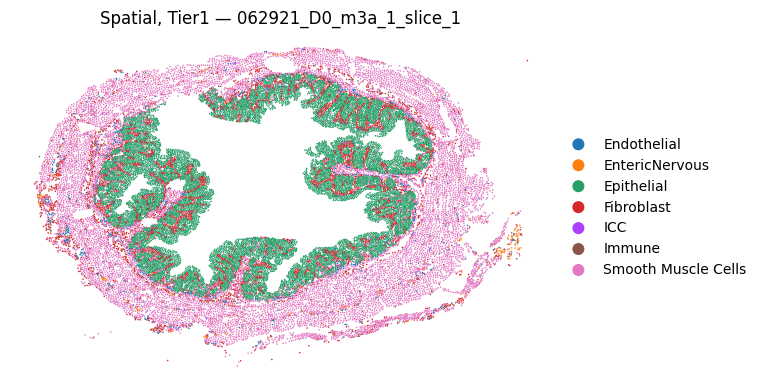

In [8]:
plt.figure(figsize=(6,6), dpi=200)
ax = sc.pl.scatter(
    ad_slice,
    x='x', y='y',
    color='Tier1',
    palette=adata_sp.uns['Tier1_colors'],
    size=5,         # tweak dot size as needed
    alpha=1.0,
    legend_loc='right margin',
    show=False      # so we can invert y before display
)

ax.invert_yaxis()

plt.title(f"Spatial, Tier1 — {slice_id}")
plt.axis('off')
plt.tight_layout()
plt.show()

In [9]:
mask_sp_HC  = adata_sp.obs['Slice_ID'].str.contains("D0")    # MERFISH Day 0
mask_sp_DSS = adata_sp.obs['Slice_ID'].str.contains("D9")    # MERFISH Day 9
mask_adata_HC  = adata.obs['condition'] == "HC"              # scRNA-seq healthy
mask_adata_DSS = adata.obs['condition'] == "DSS"             # scRNA-seq DSS

In [10]:
adata_ref_HC   = adata[mask_adata_HC, :].copy()
adata_ref_DSS = adata[mask_adata_DSS, :].copy()
adata_sp_HC    = adata_sp[mask_sp_HC, :].copy()
adata_sp_DSS   = adata_sp[mask_sp_DSS, :].copy()

# 2) Restrict both to the *same* gene set (only those MERFISH actually measured)
common_genes_HC   = adata_ref_HC.var_names.intersection(adata_sp_HC.var_names)
common_genes_DSS = adata_ref_DSS.var_names.intersection(adata_sp_DSS.var_names)

adata_ref_HC   = adata_ref_HC[:, common_genes_HC]
adata_sp_HC    = adata_sp_HC[:, common_genes_HC]
adata_ref_DSS  = adata_ref_DSS[:, common_genes_DSS]
adata_sp_DSS   = adata_sp_DSS[:, common_genes_DSS]

In [12]:
# 3) Pre‐process for Tangram
import tangram as tg
tg.pp_adatas(adata_ref_HC,  adata_sp_HC,  genes=common_genes_HC)
tg.pp_adatas(adata_ref_DSS, adata_sp_DSS, genes=common_genes_DSS)

INFO:root:725 training genes are saved in `uns``training_genes` of both single cell and spatial Anndatas.
INFO:root:725 overlapped genes are saved in `uns``overlap_genes` of both single cell and spatial Anndatas.
INFO:root:uniform based density prior is calculated and saved in `obs``uniform_density` of the spatial Anndata.
INFO:root:rna count based density prior is calculated and saved in `obs``rna_count_based_density` of the spatial Anndata.
INFO:root:725 training genes are saved in `uns``training_genes` of both single cell and spatial Anndatas.
INFO:root:725 overlapped genes are saved in `uns``overlap_genes` of both single cell and spatial Anndatas.
INFO:root:uniform based density prior is calculated and saved in `obs``uniform_density` of the spatial Anndata.
INFO:root:rna count based density prior is calculated and saved in `obs``rna_count_based_density` of the spatial Anndata.


In [13]:
# 4) Train the mapping model
map_HC  = tg.map_cells_to_space(adata_ref_HC,  adata_sp_HC,  device='cpu')
map_DSS = tg.map_cells_to_space(adata_ref_DSS, adata_sp_DSS, device='cpu')

INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 725 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.230, KL reg: 0.023
Score: 0.501, KL reg: 0.004
Score: 0.549, KL reg: 0.002
Score: 0.567, KL reg: 0.002
Score: 0.577, KL reg: 0.002
Score: 0.583, KL reg: 0.001
Score: 0.587, KL reg: 0.001
Score: 0.590, KL reg: 0.001
Score: 0.592, KL reg: 0.001
Score: 0.594, KL reg: 0.001


INFO:root:Saving results..
INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 725 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.204, KL reg: 0.027
Score: 0.384, KL reg: 0.005
Score: 0.445, KL reg: 0.003
Score: 0.472, KL reg: 0.002
Score: 0.488, KL reg: 0.002
Score: 0.499, KL reg: 0.002
Score: 0.506, KL reg: 0.001
Score: 0.512, KL reg: 0.001
Score: 0.516, KL reg: 0.001
Score: 0.520, KL reg: 0.001


INFO:root:Saving results..


In [28]:
import pandas as pd
map_HC.obs['cell_type'] = adata_ref_HC.obs['cell_type'].astype(str)
if pd.api.types.is_categorical_dtype(map_HC.obs['cell_type']):
    map_HC.obs['cell_type'] = map_HC.obs['cell_type'].cat.remove_unused_categories()

# Quick sanity check:
print(map_HC.obs['cell_type'].value_counts())

cell_type
Fibroblasts              3089
SMC                       234
Vascular endothelial      151
Lymphatic endothelial     147
Pericytes                  88
Name: count, dtype: int64


In [37]:
print(adata_sp_HC.obs['x'].shape)
print(map_HC.var['x'].shape)

(239450,)
(239450,)


In [39]:
# Project (transfer) cell‐type probabilities onto your spatial spots
tg.project_cell_annotations(
    adata_map=map_HC,
    adata_sp=adata_sp_HC,
    annotation='cell_type',   # the name of the obs‐column in map_HC
    threshold=0.5              # only assign labels with ≥50% confidence
)

# Impute the full scRNA‐seq expression profiles at each spatial spot
tg.project_genes(
    adata_map=map_HC,
    adata_sc=adata_ref_HC
)

INFO:root:spatial prediction dataframe is saved in `obsm` `tangram_ct_pred` of the spatial AnnData.


AnnData object with n_obs × n_vars = 239450 × 725
    obs: 'x', 'y', 'Mouse_ID', 'Technical_repeat_number', 'Sample_type', 'Slice_ID', 'FOV', 'Cell_ID', 'sample', 'N_genes', 'Tier1', 'Tier2', 'Tier3', 'Leiden_neigh', 'Neigh_umap_x', 'Neigh_umap_y', 'Tier2_umap_x', 'Tier2_umap_y', 'Tier3_umap_x', 'Tier3_umap_y', 'Tier1_umap_x', 'Tier1_umap_y', 'uniform_density', 'rna_count_based_density'
    var: 'n_cells', 'sparsity', 'is_training'
    uns: 'X_name', 'training_genes', 'overlap_genes'

In [40]:
# 1) Copy over the cell_type labels
map_DSS.obs['cell_type'] = adata_ref_DSS.obs['cell_type'].astype(str)

# 2) Transfer cell‐type probabilities
tg.project_cell_annotations(
    adata_map=map_DSS,
    adata_sp=adata_sp_DSS,
    annotation='cell_type',
    threshold=0.5
)

# 3) Impute expression profiles
tg.project_genes(
    adata_map=map_DSS,
    adata_sc=adata_ref_DSS
)

INFO:root:spatial prediction dataframe is saved in `obsm` `tangram_ct_pred` of the spatial AnnData.


AnnData object with n_obs × n_vars = 660977 × 725
    obs: 'x', 'y', 'Mouse_ID', 'Technical_repeat_number', 'Sample_type', 'Slice_ID', 'FOV', 'Cell_ID', 'sample', 'N_genes', 'Tier1', 'Tier2', 'Tier3', 'Leiden_neigh', 'Neigh_umap_x', 'Neigh_umap_y', 'Tier2_umap_x', 'Tier2_umap_y', 'Tier3_umap_x', 'Tier3_umap_y', 'Tier1_umap_x', 'Tier1_umap_y', 'uniform_density', 'rna_count_based_density'
    var: 'n_cells', 'sparsity', 'is_training'
    uns: 'X_name', 'training_genes', 'overlap_genes'

In [52]:
print(adata_sp_HC.obs['Slice_ID'].unique())
slice_id = "062921_D0_m3a_1_slice_1"
ad_slice_hc = adata_sp_HC[adata_sp_HC.obs['Slice_ID'] == slice_id].copy()

['062921_D0_m3a_1_slice_2', '062921_D0_m3a_1_slice_1', '062921_D0_m3a_2_slice_3', '062921_D0_m3a_2_slice_2', '062921_D0_m3a_2_slice_1', '082421_D0_m7_1_slice_1', '082421_D0_m7_1_slice_2', '082421_D0_m6_1_slice_1', '082421_D0_m6_1_slice_2', '082421_D0_m6_1_slice_3']
Categories (10, object): ['062921_D0_m3a_1_slice_1', '062921_D0_m3a_1_slice_2', '062921_D0_m3a_2_slice_1', '062921_D0_m3a_2_slice_2', ..., '082421_D0_m6_1_slice_2', '082421_D0_m6_1_slice_3', '082421_D0_m7_1_slice_1', '082421_D0_m7_1_slice_2']


In [55]:
print(adata_sp_HC)

AnnData object with n_obs × n_vars = 239450 × 760
    obs: 'x', 'y', 'Mouse_ID', 'Technical_repeat_number', 'Sample_type', 'Slice_ID', 'FOV', 'Cell_ID', 'sample', 'N_genes', 'Tier1', 'Tier2', 'Tier3', 'Leiden_neigh', 'Neigh_umap_x', 'Neigh_umap_y', 'Tier2_umap_x', 'Tier2_umap_y', 'Tier3_umap_x', 'Tier3_umap_y', 'Tier1_umap_x', 'Tier1_umap_y', 'uniform_density', 'rna_count_based_density'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'sparsity'
    uns: 'Neigh_anndata', 'Sample_type_colors', 'Tier1_colors', 'Tier3_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap', 'spatial', 'training_genes', 'overlap_genes'
    obsm: 'X_pca', 'X_umap', 'tangram_ct_pred'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


<Figure size 1200x1200 with 0 Axes>

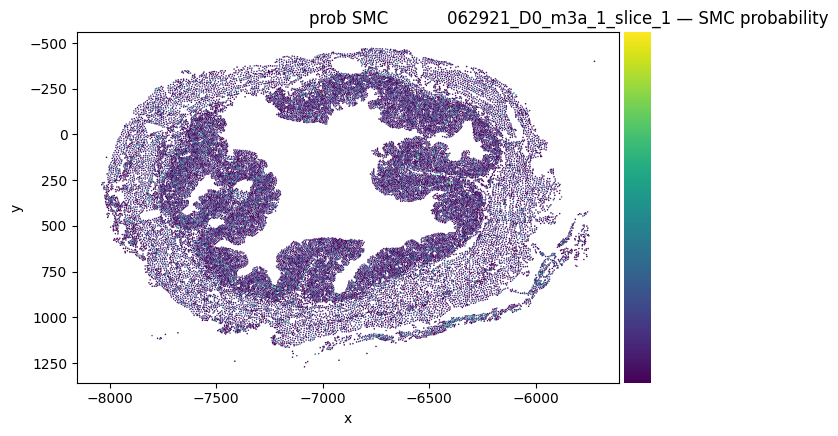

<Figure size 1200x1200 with 0 Axes>

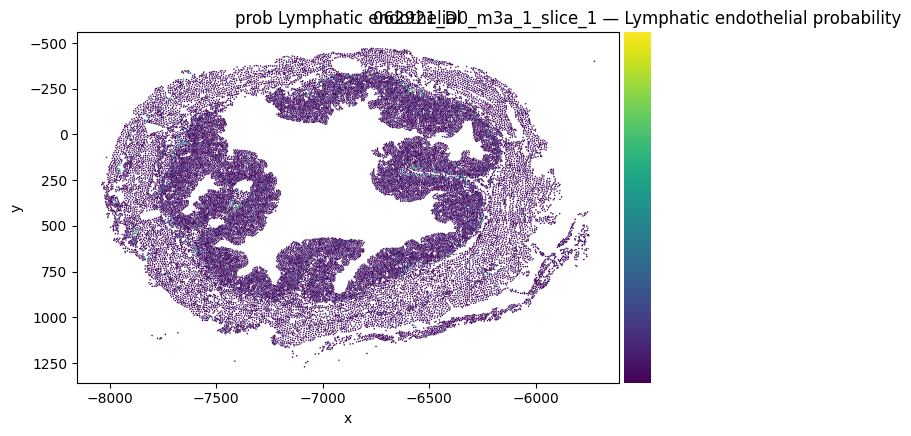

<Figure size 1200x1200 with 0 Axes>

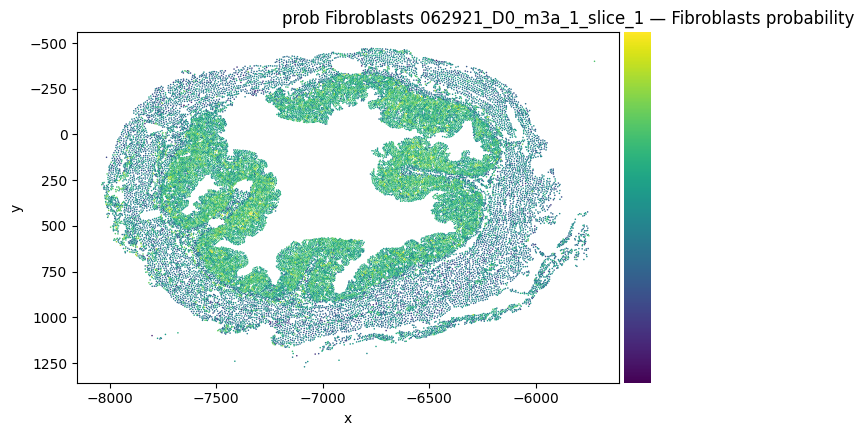

<Figure size 1200x1200 with 0 Axes>

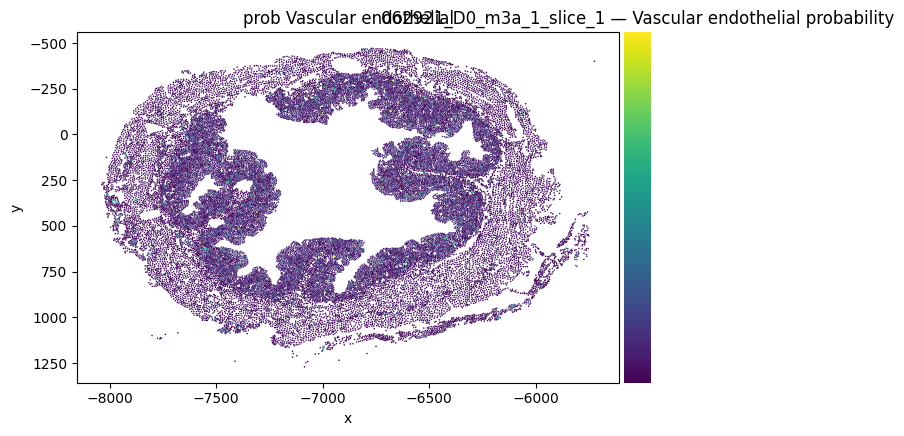

<Figure size 1200x1200 with 0 Axes>

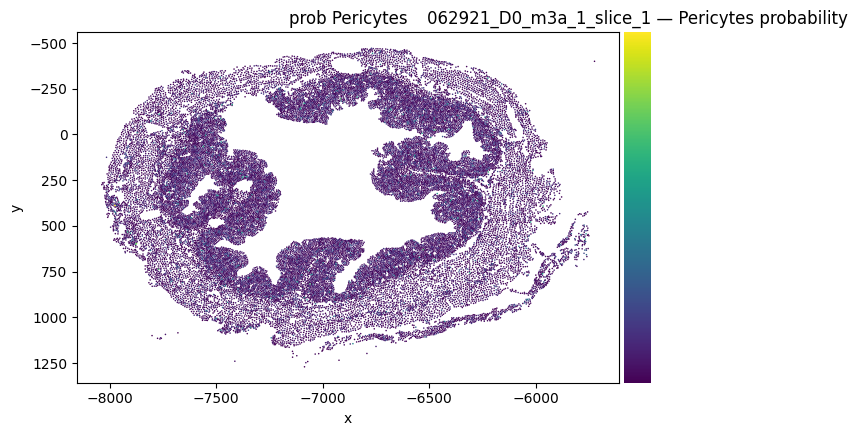

In [57]:
# 1) Pick your slice and subset
slice_id = "062921_D0_m3a_1_slice_1"                      # <-- change as needed
adata_slice = adata_sp_HC[adata_sp_HC.obs['Slice_ID'] == slice_id].copy()

# 2) Extract the spatial coords
x = adata_slice.obs['x']
y = adata_slice.obs['y']

# 3) Grab your predicted CT probabilities
ct_probs = adata_slice.obsm['tangram_ct_pred']            # a DataFrame, shape = (n_cells, n_ct)

# 4) Loop over each predicted cell type
for ct in ct_probs.columns:
    # add it to obs so sc.pl.scatter can see it
    adata_slice.obs[f'prob_{ct}'] = ct_probs[ct].values

    # Plot
    plt.figure(figsize=(6,6), dpi=200)
    ax = sc.pl.scatter(
        adata_slice,
        x='x', y='y',
        color=f'prob_{ct}',        # plot the probability
        size=5,
        show=False
    )
    ax.invert_yaxis()
    plt.title(f"{slice_id} — {ct} probability")
    plt.axis('off')
    plt.tight_layout()
    plt.show()


In [59]:
slice_id = "062921_D0_m3a_1_slice_1"
ad_slice = adata_sp_HC[adata_sp_HC.obs['Slice_ID'] == slice_id].copy()

# 2) grab your Tier1 labels and color lookup
labels = ad_slice.obs['Tier1']
colors = ad_slice.uns['Tier1_colors']
if isinstance(colors, dict):
    palette = colors
else:
    cats = ad_slice.obs['Tier1'].cat.categories
    palette = dict(zip(cats, colors))

x = ad_slice.obs['x']
y = ad_slice.obs['y']

<Figure size 1200x1200 with 0 Axes>

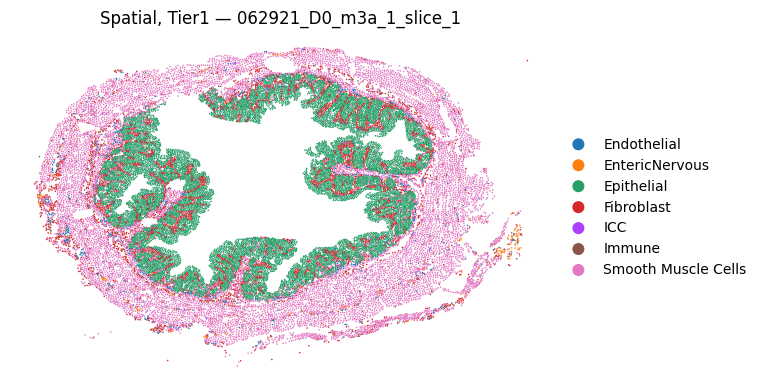

In [60]:
plt.figure(figsize=(6,6), dpi=200)
ax = sc.pl.scatter(
    ad_slice,
    x='x', y='y',
    color='Tier1',
    palette=adata_sp.uns['Tier1_colors'],
    size=5,         # tweak dot size as needed
    alpha=1.0,
    legend_loc='right margin',
    show=False      # so we can invert y before display
)

ax.invert_yaxis()

plt.title(f"Spatial, Tier1 — {slice_id}")
plt.axis('off')
plt.tight_layout()
plt.show()

In [61]:
adata_sp.write('adata_sp_HC.h5ad')
adata.write('adata_sp_DSS.h5ad')